In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler,RobustScaler
import scipy
import matplotlib.gridspec as gridspec
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_validate
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import GridSearchCV
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import matplotlib.style as style
from sklearn.model_selection import train_test_split


In [5]:
pd.options.display.max_columns = 99

In [6]:
df = pd.read_csv('clean.csv')

In [7]:
df.drop(columns=['id'], inplace=True)

In [8]:
df

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_since,instant_bookable,latitude,longitude,review_scores_rating,zipcode,bedrooms,beds,ageofhost,wifi,kitchen,AC,TV,Washer,Dryer,PetsFriendly,Parking,EssentialAdmenities,Description_Len
0,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,t,t,2012-03-26,f,40.696524,-73.991617,100.0,11201,1.0,1.0,3038 days 00:00:00.000000000,True,True,True,False,False,False,False,False,True,211
1,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,t,f,2017-06-19,t,40.766115,-73.989040,93.0,10019,3.0,3.0,1127 days 00:00:00.000000000,True,True,True,False,True,True,False,False,True,1000
2,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,t,2016-10-25,t,40.808110,-73.943756,92.0,10027,1.0,3.0,1364 days 00:00:00.000000000,True,True,True,True,False,False,False,False,True,1000
3,6.620073,House,Entire home/apt,4,1.0,Real Bed,flexible,True,SF,t,t,2015-04-19,f,37.772004,-122.431619,NaN,94117.0,2.0,2.0,1919 days 00:00:00.000000000,True,True,False,True,True,True,False,False,True,468
4,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,t,t,2015-03-01,t,38.925627,-77.034596,40.0,20009,0.0,1.0,1968 days 00:00:00.000000000,True,True,True,True,False,False,False,False,True,699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,Apartment,Private room,1,1.0,Real Bed,flexible,False,NYC,t,t,2013-03-24,f,40.709025,-73.939405,NaN,11206.0,1.0,1.0,2675 days 00:00:00.000000000,False,False,False,False,False,False,False,False,False,25
74107,5.043425,Apartment,Entire home/apt,4,2.0,Real Bed,moderate,True,LA,t,f,2016-05-03,f,33.871549,-118.396053,93.0,90254,2.0,4.0,1539 days 00:00:00.000000000,True,True,False,True,True,True,False,True,True,302
74108,5.220356,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,t,2012-01-05,t,40.706749,-73.942377,94.0,11206.0,2.0,2.0,3119 days 00:00:00.000000000,True,True,True,True,True,True,False,False,True,1000
74109,5.273000,Apartment,Entire home/apt,2,1.0,Real Bed,strict,True,NYC,t,f,2017-09-17,t,40.738535,-74.000157,NaN,10011,0.0,2.0,1037 days 00:00:00.000000000,True,True,True,True,True,True,False,False,True,555


In [9]:
Train, Test = train_test_split(df, test_size=0.80)
train, val = train_test_split(Train, test_size=0.20)

# EDA
---

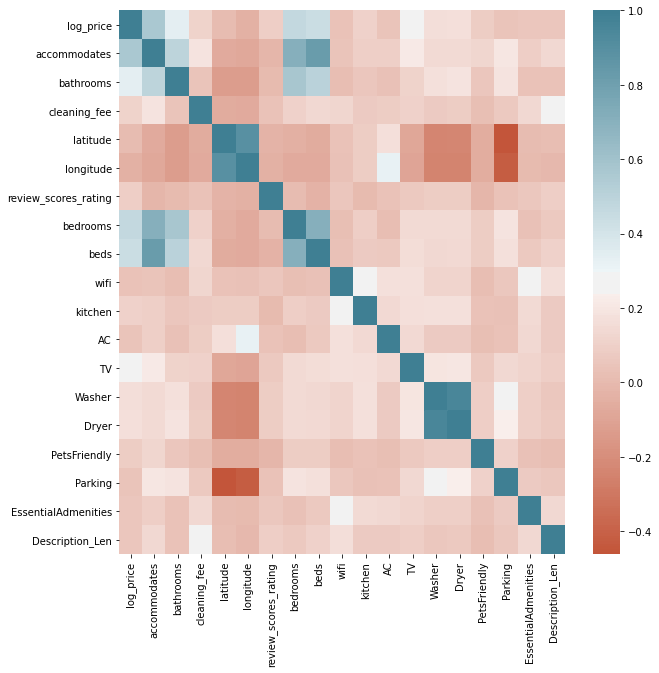

In [10]:
corr = Train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap=sns.diverging_palette(20, 220, n=200))
plt.show()

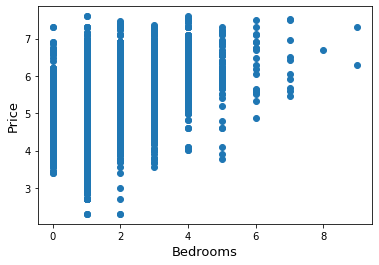

In [11]:
fig, ax = plt.subplots()
ax.scatter(x = Train['bedrooms'], y = Train['log_price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('Bedrooms', fontsize=13)
plt.show()

In [12]:
def target_analysis(target):
    fig = plt.figure(constrained_layout=True, figsize=(14,10))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(target,norm_hist=True,ax=ax1)
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('Q-Q Plot')
    stats.probplot(target,plot=ax2)
    ax3 = fig.add_subplot(grid[:,2])
    ax3.set_title('Box Plot')
    sns.boxplot(target,orient='v',ax=ax3)
    print(f'skweness is { target.skew()}')
    plt.show()

skweness is 0.5099628344861179


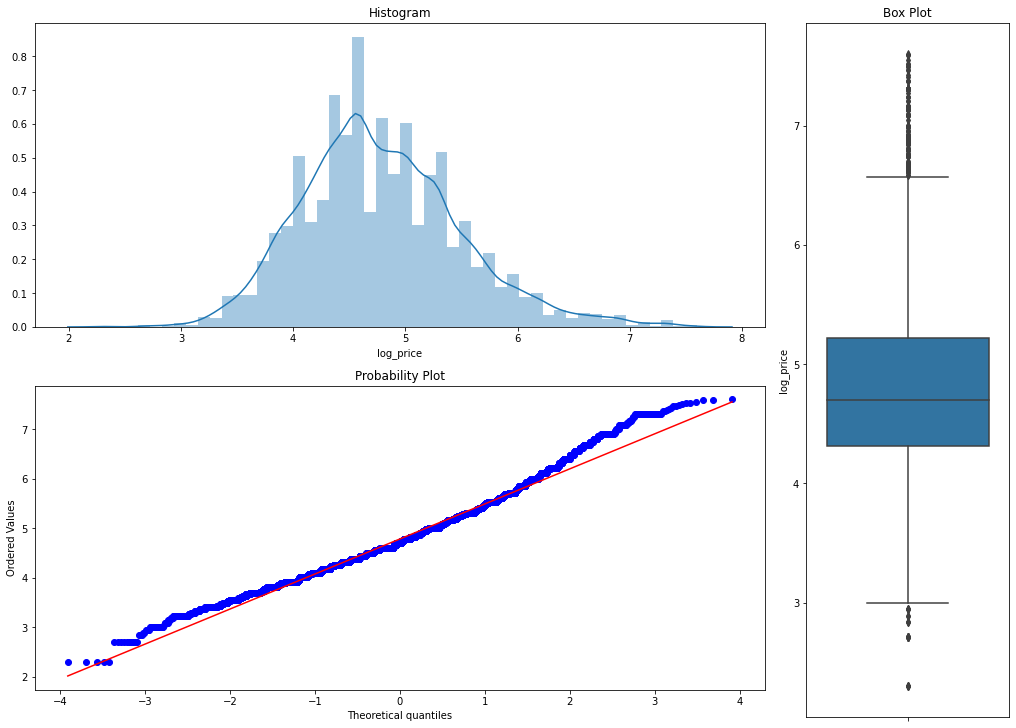

In [13]:
target_analysis(Train['log_price'])

# Feature Selection
---

In [14]:
list(train.columns)

['log_price',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bed_type',
 'cancellation_policy',
 'cleaning_fee',
 'city',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_since',
 'instant_bookable',
 'latitude',
 'longitude',
 'review_scores_rating',
 'zipcode',
 'bedrooms',
 'beds',
 'ageofhost',
 'wifi',
 'kitchen',
 'AC',
 'TV',
 'Washer',
 'Dryer',
 'PetsFriendly',
 'Parking',
 'EssentialAdmenities',
 'Description_Len']

In [51]:
feature = [
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bed_type',
 'cancellation_policy',
 'cleaning_fee',
 #'city',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_since',
 'instant_bookable',
 'latitude',
 'longitude',
 'review_scores_rating',

 'bedrooms',
 'beds',
 'ageofhost',
 'wifi',
 'kitchen',
 'AC',
 'TV',
 'Washer',
 'Dryer',
 'PetsFriendly',
 'Parking',
 'EssentialAdmenities',
 'Description_Len']
target = 'log_price'
X_train = train[feature]
X_test = val[feature]
Y_test = val[target]
Y_train = train[target]

In [52]:
X_train

,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,host_has_profile_pic,host_identity_verified,host_since,instant_bookable,latitude,longitude,review_scores_rating,bedrooms,beds,ageofhost,wifi,kitchen,AC,TV,Washer,Dryer,PetsFriendly,Parking,EssentialAdmenities,Description_Len
73087,Apartment,Entire home/apt,4,2.0,Real Bed,flexible,True,t,f,2013-08-31,f,40.746110,-73.992088,87.0,2.0,2.0,2515 days 00:00:00.000000000,True,True,True,True,True,True,False,False,False,955
38606,Apartment,Entire home/apt,2,1.0,Real Bed,flexible,True,t,t,2016-04-22,t,40.596736,-74.064708,91.0,1.0,1.0,1550 days 00:00:00.000000000,True,True,False,False,True,True,False,True,True,1000
15783,Apartment,Entire home/apt,8,2.0,Real Bed,strict,True,t,t,2012-05-29,t,41.934576,-87.653596,87.0,4.0,6.0,2974 days 00:00:00.000000000,True,True,True,True,True,True,False,False,True,1000
46819,House,Private room,1,2.0,Real Bed,flexible,False,t,t,2013-11-11,f,34.188158,-118.563852,NaN,3.0,3.0,2443 days 00:00:00.000000000,True,True,True,True,True,True,False,False,True,268
37901,House,Shared room,16,1.0,Real Bed,strict,False,t,t,2009-07-24,f,38.876157,-76.963657,74.0,1.0,4.0,4014 days 00:00:00.000000000,True,True,True,True,True,True,False,False,False,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34069,Apartment,Entire home/apt,6,2.0,Real Bed,flexible,True,t,f,2014-08-31,t,34.016272,-118.490628,100.0,2.0,2.0,2150 days 00:00:00.000000000,True,True,True,True,True,True,False,False,True,797
68447,House,Private room,2,1.0,Real Bed,flexible,False,t,t,2016-01-31,f,34.177381,-118.525698,99.0,1.0,1.0,1632 days 00:00:00.000000000,True,True,True,False,True,True,False,True,True,93
6219,House,Private room,2,1.0,Real Bed,strict,True,t,t,2015-12-07,t,40.692398,-73.762313,100.0,1.0,1.0,1687 days 00:00:00.000000000,True,True,True,True,False,False,False,True,True,796
34718,Apartment,Entire home/apt,2,1.0,Real Bed,strict,True,t,t,2013-04-26,f,40.658449,-73.961305,80.0,1.0,1.0,2642 days 00:00:00.000000000,True,False,False,True,False,False,False,False,False,489


# Establishing Baseline
---

In [53]:
# Get mean baseline
print('Mean Baseline (using 0 features)')
guess = Y_train.mean()

Mean Baseline (using 0 features)


In [54]:
# Train Error
from sklearn.metrics import mean_absolute_error
y_pred = [guess] * len(Y_train)
predictions = np.expm1(y_pred)
mae = mean_absolute_error(np.expm1(Y_train), predictions)
print(f'Train Error: ${mae:.2f}')


Train Error: $87.89


In [55]:
# Validation Error
y_pred = [guess] * len(Y_test)
predictions = np.expm1(y_pred)
mae = mean_absolute_error(Y_test, predictions)
print(f'Validation Error: ${mae:.2f}')

Validation Error: $113.51


In [56]:

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import category_encoders as ce
import numpy as np
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import KNNImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from random import randint
from sklearn.ensemble import GradientBoostingRegressor


pipeline = make_pipeline(
    ce.TargetEncoder(), 
    SimpleImputer(),
    StandardScaler(), 
    GradientBoostingRegressor(random_state=42)
)
param_distributions = {
    'simpleimputer__strategy': ['mean', 'median'], 
    'gradientboostingregressor__max_depth': [5, 10, 15, 20, None], 
    'gradientboostingregressor__loss': ['ls','lad','huber','quantile'], 
}

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=2, 
    cv=2, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)
search.fit(X_train, Y_train);

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    2.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.1min finished


In [57]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)
pipeline = search.best_estimator_
y_pred = pipeline.predict(X_test)
predictions = np.expm1(y_pred)
predictions
mae = mean_absolute_error(Y_test, predictions)
print(f'Test MAE: ${mae:,.0f}')

Best hyperparameters {'simpleimputer__strategy': 'median', 'gradientboostingregressor__max_depth': 20, 'gradientboostingregressor__loss': 'huber'}
Cross-validation MAE 0.40759974238022184
Test MAE: $139


In [58]:
from sklearn.inspection import permutation_importance

pi = permutation_importance(pipeline,
                            X_test,
                            Y_test,
                            random_state=42,
                            n_jobs=-1)

p_importance = pd.DataFrame({'feature' : X_test.columns,
                             'weight'  : pi.importances_mean,
                             'std'     : pi.importances_std})

p_importance.sort_values('weight', ascending=False).tail(30)

,feature,weight,std
1,room_type,0.350071,0.009203
12,longitude,0.221663,0.010185
11,latitude,0.169731,0.012792
14,bedrooms,0.095318,0.008621
2,accommodates,0.083841,0.011325
3,bathrooms,0.052267,0.005214
15,beds,0.027024,0.003082
13,review_scores_rating,0.017753,0.003919
20,TV,0.014401,0.002343
24,Parking,0.007026,0.002208


In [23]:
import joblib
joblib.dump(pipeline, 'prediction.pkl')

['prediction.pkl']

In [24]:
y_pred = pipeline.predict(X_test)
predictions = np.expm1(y_pred)
predictions

array([ 64.72539049, 127.08385425,  78.36442786, ..., 115.38536587,
        79.84694755, 106.41490289])

In [25]:
testing_df = X_test[:1]
testing_df

,property_type,room_type,accommodates,bathrooms,cleaning_fee,city,latitude,longitude,review_scores_rating,zipcode,bedrooms,beds,Dryer,Parking,Description_Len
69909,House,Private room,6,2.0,True,LA,34.000745,-118.337577,100.0,90043,2.0,2.0,False,True,891


In [26]:
y_pred = pipeline.predict(testing_df)
predictions = np.expm1(y_pred)
predictions[0]

64.72539048868221

In [27]:
testing_df.to_csv('sample_pred.csv',index=False)

In [28]:
import pandas as pd
import joblib
import pickle
test_model_data = pd.read_csv('sample_pred.csv')
model = joblib.load('prediction.pkl')
response  = round(model.predict(test_model_data)[0],2)

In [29]:
round(response,2)

4.62

In [30]:
import pandas as pd
import joblib
import pickle
import json
import numpy as np
test_model_data = pd.read_csv('sample_pred.csv')
model = joblib.load('prediction.pkl')
response  = round(model.predict(test_model_data)[0],2)
response = np.exmp1(response)
price_list = ['Prices']
response_list = [f'{round(response,2)}']
response_dict = dict(zip(price_list, response_list))
response_json = json.dumps(response_dict)
response_json

AttributeError: module 'numpy' has no attribute 'exmp1'

In [ ]:
response

In [ ]:
{
  "property_type": "string",
  "room_type": "string",
  "accomodates": 0,
  "bathrooms": 0,
  "clean_fee": true,
  "city": "string",
  "latitude": 0,
  "longitude": 0,
  "review_scores_rating": 0,
  "zipcode": 0,
  "bedrooms": 0,
  "beds": 0,
  "Dryer": true,
  "Parking": true,
  "Description_Len": 0
}nn

In [ ]:
list(test_model_data.columns)

In [ ]:
nnnnnnnnnnnnnnnn